In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X = np.arange(1, 11) / 11
print(X)
Y = list(map(lambda x: 1 - x**2, X))
plt.plot(X, Y)
plt.show()

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143
 0.144 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155
 0.156 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.

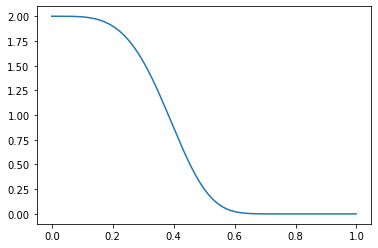

In [12]:
import matplotlib.pyplot as plt
import numpy as np
#X = np.arange(1, 13) / 13
X = np.arange(0, 1, 0.001)
print(X)
Y = list(map(lambda x: (1 - x**4) ** 32, X))
plt.plot(X, Y)
plt.show()

In [20]:
import numpy as np
import os
import pylab
import PIL

class DSMap:
    def __init__(self, n, coef):
        self.n = n
        self.coef = coef
        self.dsmap = np.zeros((2**n + 1, 2**n + 1), dtype = float)
        self.SetStartValues(n, 100)
    
    def Generate(self):
        self.Algo(self.n, self.coef)
        
    def Smoothing(self, p):
        x = 2 * np.random.random_sample() - 1
        return x * (1 - p ** 4) ** 32 / 2
    
    def SetStartValues(self, n, startHeight):
        _2powN = 2 ** n
        self.dsmap[0][0] = round(2 * np.random.random_sample() * startHeight - startHeight)
        self.dsmap[0][_2powN] = round(2 * np.random.random_sample() * startHeight - startHeight)
        self.dsmap[_2powN][0] = round(2 * np.random.random_sample() * startHeight - startHeight)
        self.dsmap[_2powN][_2powN] = round(2 * np.random.random_sample() * startHeight - startHeight)
    
    def Diamond(self, x, y, _len , coef, p):
        val = self.dsmap[y][x] + self.dsmap[y][x + 2 * _len] + self.dsmap[y + 2 * _len][x] + self.dsmap[y + 2 * _len][x + 2 * _len]
        self.dsmap[y + _len][x + _len] = round(val / 4 + self.Smoothing(p / (self.n + 1)) * val * coef)

    def Square(self, x, y, _len, coef, _2powN, p):
        def Check(mas, x, y ,_2powN):
            if  0 <= x <= _2powN and 0 <= y <= _2powN:
                return mas[y][x]
            return 0
        points = [[y, x + _len], [y + _len, x], [y + _len, x + 2 * _len], [y + 2 * _len, x + _len]]
        
        pqueue = [[0,-1],[-1,0],[1,0],[0,1]]

        for y, x in points:
            val = 0
            for cy, cx in pqueue:
                val += Check(self.dsmap, x + cx * _len, y + cy * _len, _2powN)
            self.dsmap[y][x] = round(val / 4 + self.Smoothing(p / (self.n + 1)) * val * coef)
        
    def Algo(self, n, coef):
        _2powN = 2 ** n
        _len = _2powN
        x = 0
        y = 0
        for i in range(n):
            for iy in range(int(_2powN/_len)):
                for ix in range(int(_2powN/_len)):
                    self.Diamond(x + ix * _len, y + iy * _len, _len // 2, coef, i + 1)
            for iy in range(int(_2powN/_len)):
                for ix in range(int(_2powN/_len)):
                    self.Square(x + ix * _len, y + iy * _len, _len // 2, coef, _2powN, i + 1)
            _len //= 2
    
    def SaveToPic(self, path):
        pathlist = path.split('/')
        self.dsmap -= self.dsmap.min()
        self.dsmap /= self.dsmap.max()
        im = PIL.Image.new("RGB", (2 ** n + 1, 2 ** n + 1))
        px = im.load()
        for mapY in range(len(self.dsmap)):
            for mapX in range(len(self.dsmap[0])):
                tval = int(round(255*self.dsmap[mapX, mapY]))
                px[mapX, mapY] = (tval, tval, tval)
        if len(pathlist) == 1:    
            im.save("./" + path)
        else:
            tpath = pathlist[0]
            for p in range(1, len(pathlist)):
                if not os.path.exists(tpath):
                    os.mkdir(tpath)
                tpath += "/" + pathlist[p]
            im.save(tpath)
            
    def SaveToArray(self, path):
        if path.split(".")[-1] != "npy":
            ans = input("File should be *.npy\nRewrite?(y/n)")
            if ans == "" or ans == "y":
                path = path.split(".")[0] + ".npy"
        pathlist = path.split('/')
        self.dsmap -= self.dsmap.min()
        self.dsmap /= self.dsmap.max()
        if len(pathlist) == 1:    
            np.save("./" + path, self.dsmap)
        else:
            tpath = pathlist[0]
            for p in range(1, len(pathlist)):
                if not os.path.exists(tpath):
                    os.mkdir(tpath)
                tpath += "/" + pathlist[p]
            np.save(tpath, self.dsmap)
            
if __name__ == "__main__":
    n = int(input("N = ?"))
    c = 0.17
    _map = DSMap(n, c)
    _map.Generate()
    print(_map.dsmap.min())
    _map.SaveToPic("./test/test.bmp")
    _map.SaveToArray("./test/test.npy")
    print("Done!")


N = ?10
-66.0
Done!


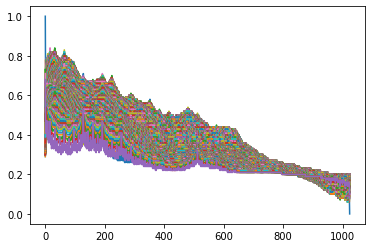

In [19]:
import matplotlib.pyplot as plt
plt.plot(_map.dsmap)
plt.show()